In [1]:
using Pkg
Pkg.update()
using Plots
using Plots.PlotMeasures

    Updating registry at `C:\Users\jakdar\.julia\registries\General.toml`
  No Changes to `C:\Users\jakdar\uni\bachelorarbeit\VeryDiff\Project.toml`
  No Changes to `C:\Users\jakdar\uni\bachelorarbeit\VeryDiff\Manifest.toml`


In [2]:
struct Result
    net :: String
    spec :: String
    status :: String
    runtime :: Int64
    num_propagation :: Int64
    num_input_splits :: Int64
    num_neuron_splits :: Int64
    initial_δ_bound :: Float64
    final_δ_bound :: Float64
end

struct Results
    verifier_name :: String
    results :: Vector{Result}
end

In [3]:
function read_results(name::String, csv_dir::String; sort_func=nothing)
    results = Result[]
    open(csv_dir, "r") do f
        while !eof(f)
            line = split(readline(f), ",")
            net = replace(line[1], " " => "")
            spec = replace(line[2], " " => "")
            status = replace(line[3], " " => "")
            runtime = parse(Int64, string(line[4]))
            num_propagation = parse(Int64, string(line[5]))
            num_input_splits = parse(Int64, string(line[6]))
            num_neuron_splits = parse(Int64, string(line[7]))
            initial_δ_bound = parse(Float64, string(line[8]))
            final_δ_bound = parse(Float64, string(line[9]))
            push!(results, Result(net, spec, status, runtime, num_propagation, num_input_splits, num_neuron_splits, initial_δ_bound, final_δ_bound))
        end
    end
    if !isnothing(sort_func)
        sort!(results, by=sort_func)
    end
    return Results(name, results)
end

read_results (generic function with 1 method)

In [4]:
cur_dir = @__DIR__
exp_final_dir = joinpath(cur_dir, "experiments_final")

acas_name = "acas-0.5"
mnist_name = "mnist-1.0"

results_name = "results.csv"

verydiff_name = "VeryDiff"
verydiff_acas_path = joinpath(exp_final_dir, verydiff_name, acas_name, results_name)
verydiff_mnist_path = joinpath(exp_final_dir, verydiff_name, mnist_name, results_name)

# heuristic_variants = [["ZB" "ZU" "DB" "DU"], ["Alt" "Base" "Input" "DiffZono" "Input-DiffZono"]]
heuristic_variants = [["ZU" "DU"], ["Base" "Input-DiffZono"]]

names = ["DeepSplit", "ZonoContract"]
for v in heuristic_variants
    names = reduce(vcat, [d * "-" .* v for d in names])
end

acas_paths = Tuple{String, String}[]
mnist_paths = Tuple{String, String}[]
for name in names
    dir = joinpath(exp_final_dir, name)
    push!(acas_paths, (name, joinpath(dir, acas_name, results_name)))
    # push!(mnist_paths, (name, joinpath(dir, mnist_name, results_name)))
end

push!(acas_paths, (verydiff_name, verydiff_acas_path))
# push!(mnist_paths, (verydiff_name, verydiff_mnist_path))

println("...")

...


In [ ]:
sort_func_solved = r -> r.runtime
sort_func_unsolved = r -> (r.initial_δ_bound - r.final_δ_bound) / (r.initial_δ_bound - 0.5)

acas_results = [read_results(n, p) for (n, p) in acas_paths]
# mnist_results = [read_results(n, p; sort_func=sort_func) for (n, p) in mnist_paths]

acas_solved, acas_unsolved = Results[], Results[]
# mnist_solved, mnist_unsolved = Results[], Results[]

for results in acas_results
    mask = map(r -> r.status != "UNKNOWN", results.results)
    solved = results.results[mask]
    unsolved = results.results[.!mask]
    sort!(solved, by=sort_func_solved)
    sort!(unsolved, by=sort_func_unsolved, rev=true)
    push!(acas_solved, Results(results.verifier_name, solved))
    push!(acas_unsolved, Results(results.verifier_name, unsolved))
end

# for res in acas_unsolved
#     for inst in res.results
#         @assert inst.runtime / 1e9 >= 120.0
#     end
# end

# for results in mnist_results
    # mask = map(r -> r.status != "UNKNOWN", results.results)
    # solved = results.results[mask]
    # unsolved = results.results[.!mask]
    # sort!(solved, by=sort_func_solved)
    # sort!(solved, by=sort_func_unsolved)
    # push!(mnist_solved, Results(results.verifier_name, solved))
    # push!(mnist_unsolved, Results(results.verifier_name, unsolved))
# end


In [6]:
x_acas_solved = map(r -> 1:size(r.results, 1), acas_solved)
y_acas_solved = map(acas_solved) do r
    return map(r.results) do r
        return r.runtime / 1e9
    end
end

# x_mnist_solved = map(r -> 1:size(r.results, 1), mnist_solved)
# y_mnist_solved = map(mnist_solved) do r
#     return map(r.results) do r
#         return r.runtime / 1e9
#     end 
# end


9-element Vector{Vector{Float64}}:
 [0.000506523, 0.00057838, 0.000588579, 0.001460873, 0.001475828, 0.001515034, 0.001674563, 0.001684837, 0.001729971, 0.001746858  …  0.001935849, 0.001975002, 0.002097492, 0.002141386, 0.002904024, 0.089699542, 0.145608997, 0.765413608, 1.954987538, 33.548336316]
 [0.00062526, 0.000644379, 0.001151494, 0.00154236, 0.001585069, 0.001625985, 0.001753941, 0.001777031, 0.001809945, 0.001842997  …  0.002235771, 0.002291134, 0.003391156, 0.012302138, 0.063336344, 0.105431996, 0.308616087, 0.50581473, 1.037357073, 25.10392692]
 [0.000529263, 0.000547969, 0.000609167, 0.001322252, 0.001551023, 0.001642012, 0.001688343, 0.001742474, 0.001897618, 0.001949787  …  0.020073558, 0.26868056, 1.369460413, 2.466538698, 6.57327772, 8.630882472, 20.958807253, 89.494471212, 115.18755088, 115.737001664]
 [0.000632231, 0.000657034, 0.000695635, 0.001519762, 0.001598384, 0.001775231, 0.001775742, 0.001837944, 0.001862128, 0.00188249  …  0.917720758, 1.222218453, 1.28812074

In [7]:
verydiff_rgx = r"VeryDiff"
deepsplit_rgx = r"DeepSplit"
zonocontract_rgx = r"ZonoContract"
alt_rgx = r"((ZB|ZU|DB|DU)\-Alt$)"
base_rgx = r"((ZB|ZU|DB|DU)\-Base$)"
input_rgx = r"((ZB|ZU|DB|DU)\-Input$)"
diffzono_rgx = r"((ZB|ZU|DB|DU)\-DiffZono$)"
input_diffzono_rgx = r"((ZB|ZU|DB|DU)\-Input\-DiffZono$)"

config_match_rgx = (res, rgx) -> !isnothing(findfirst(rgx, res.verifier_name))
config_match = (res, rgxs) -> all(map(rgx -> config_match_rgx(res, rgx), rgxs))
filter_indices = (res, rgxs) -> filter(i -> config_match(res[i], rgxs), 1:size(res, 1))

# acas_indices = rgxs -> filter_indices(acas_solved, rgxs)
# mnist_indices = rgxs -> filter_indices(mnist_solved, rgxs)

#40 (generic function with 1 method)

In [35]:
verydiff_acas_results = acas_results[filter_indices(acas_results, [verydiff_rgx])][1]

for res in acas_results
    if res.verifier_name == verydiff_acas_results.verifier_name
        continue
    end
    for i in 1:100
        s₁, s₂ = verydiff_acas_results.results[i].status, res.results[i].status
        p₁, p₂ = verydiff_acas_results.results[i].spec, res.results[i].spec
        @assert s₁ == s₂ || s₁ == "UNKNOWN" || s₂ == "UNKNOWN" "(status₁, prop₁): ($s₁, $p₁), (status₂, prop₂): ($s₂, $p₂)"
    end
end


In [25]:
configs = [
    ("LP-Base", [deepsplit_rgx, base_rgx]), 
    ("ZC-Base", [zonocontract_rgx, base_rgx]),
    ("LP-Input-DiffZono", [deepsplit_rgx, input_diffzono_rgx]),
    ("ZC-Input-DiffZono", [zonocontract_rgx, input_diffzono_rgx])
]

verydiff_config = ("VeryDiff", [verydiff_rgx])

("VeryDiff", Regex[r"VeryDiff"])

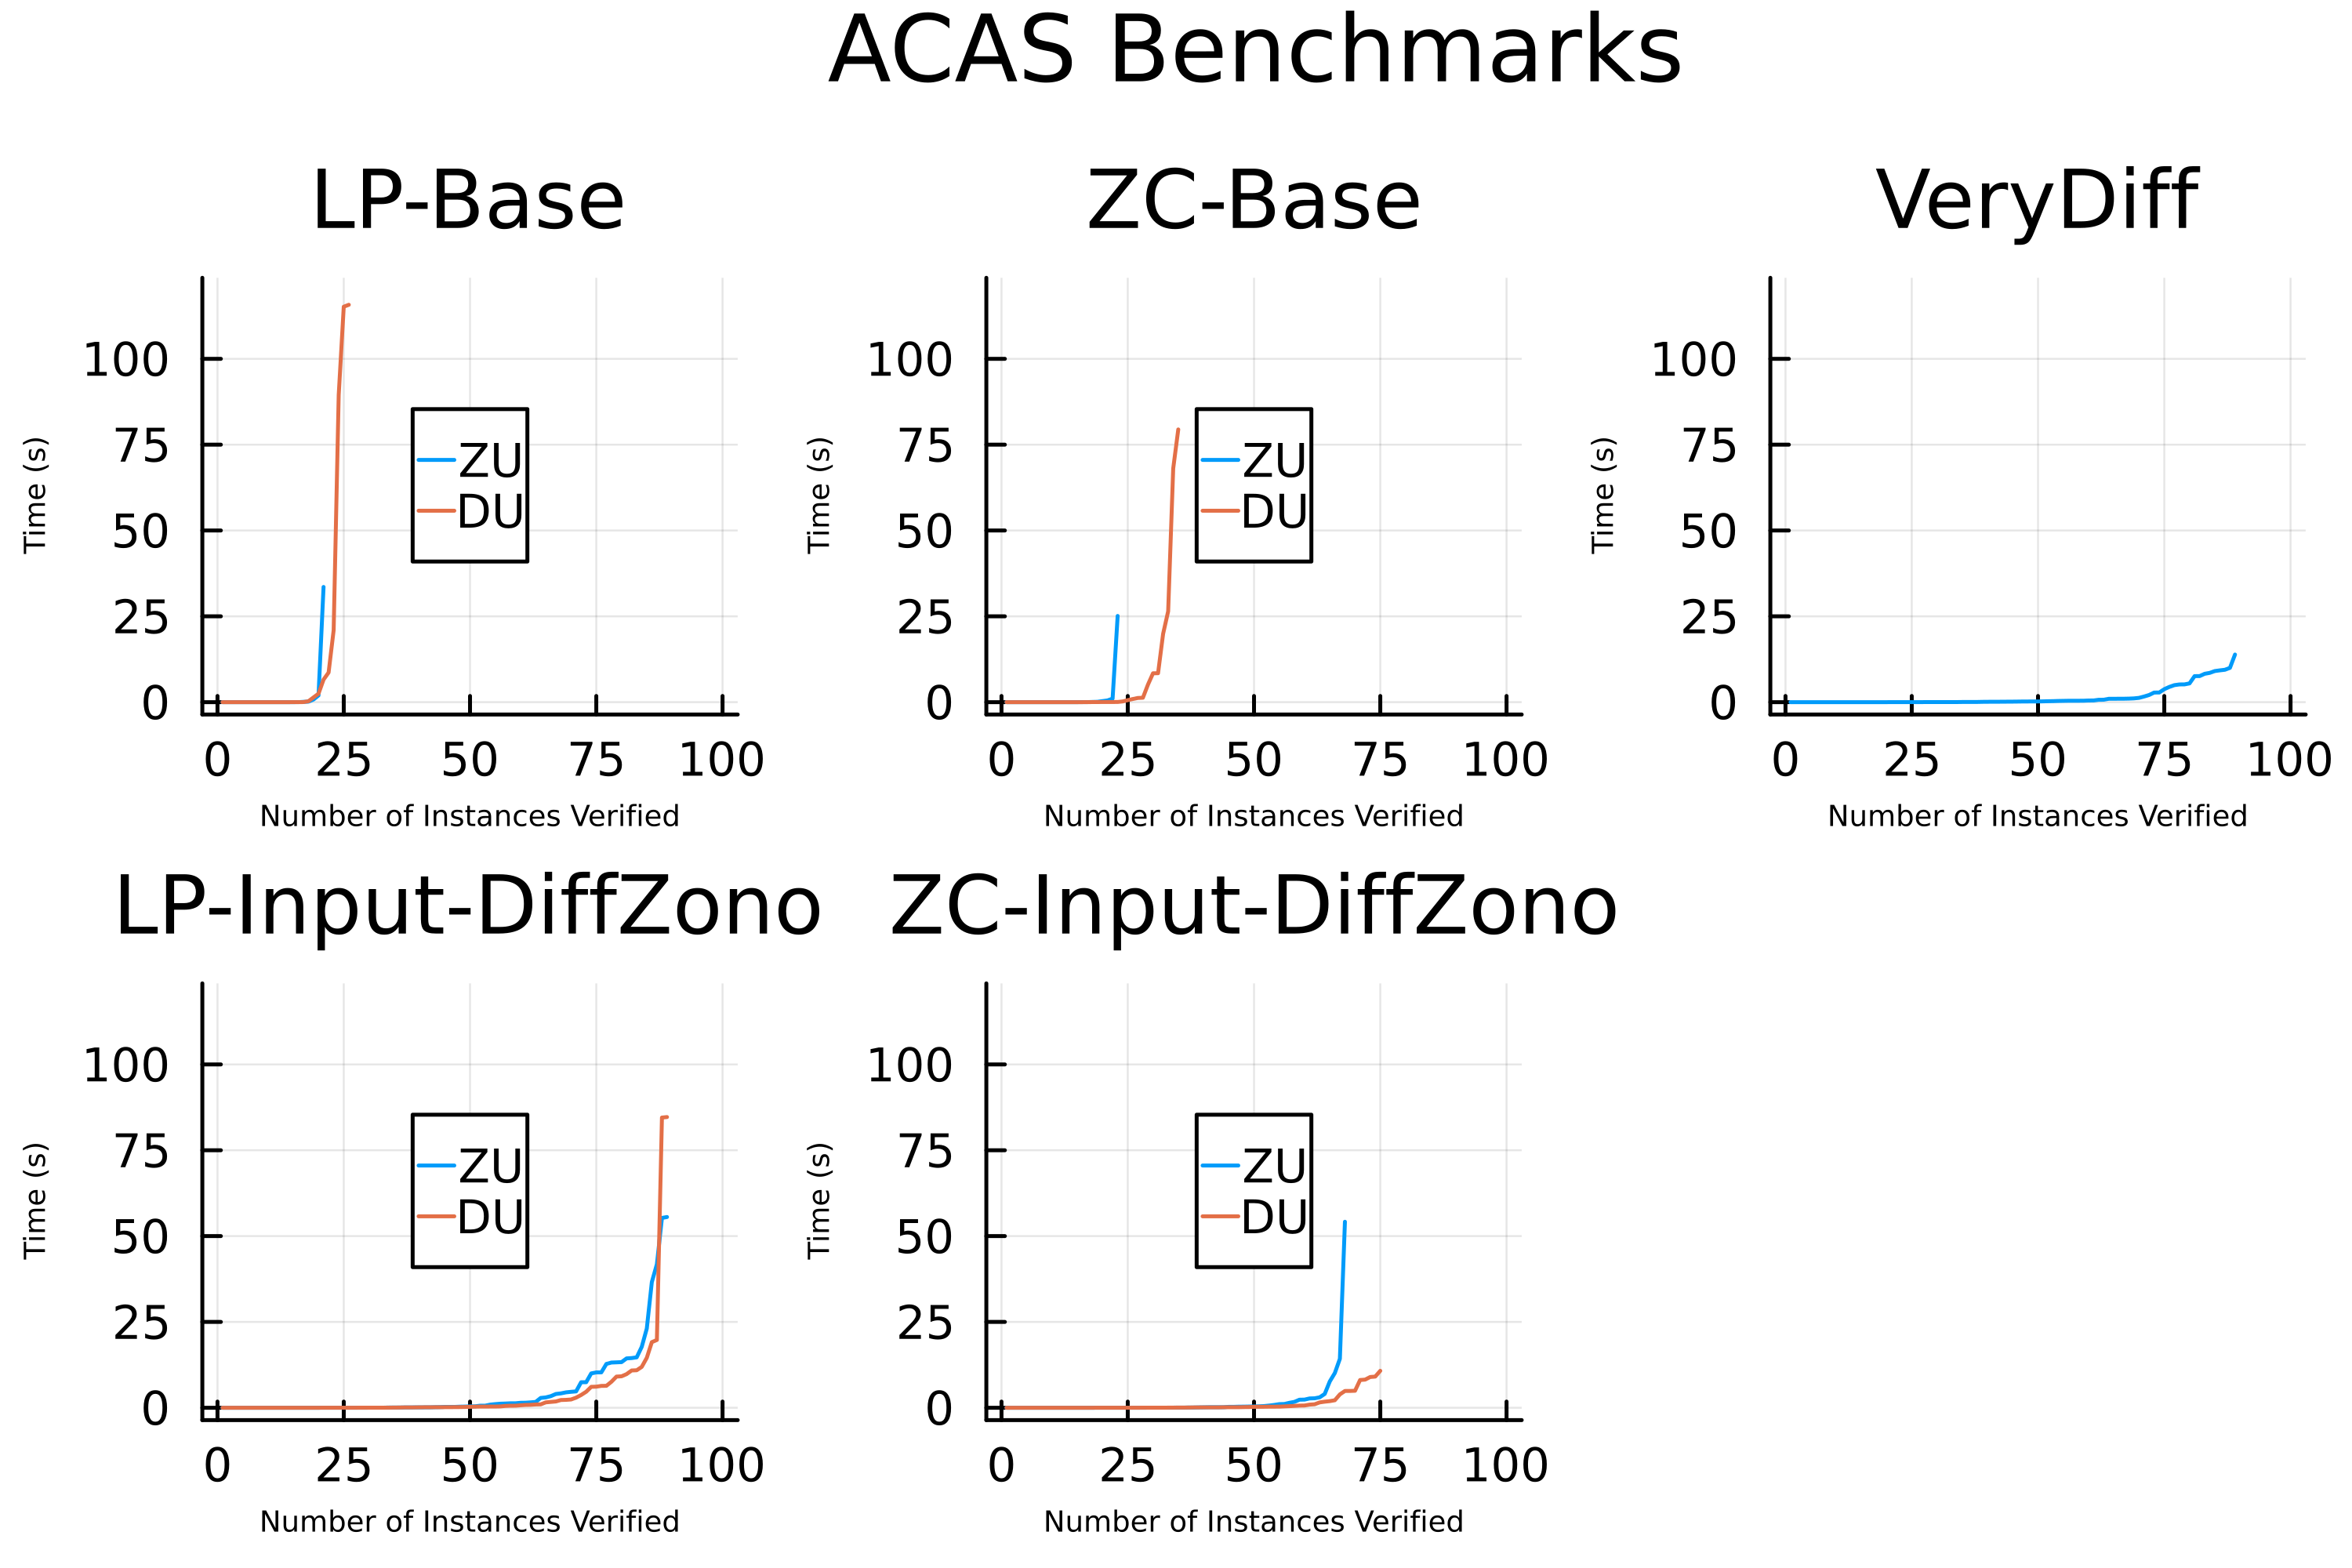

In [26]:
num_configs = size(configs, 1) + 1

p = plot(dpi=500, xlims=(0, 100), ylims=(0, 120), widen=true, xguidefontsize=5, yguidefontsize=5, legend=:legend; layout=num_configs)
xlabel!("Number of Instances Verified")
ylabel!("Time (s)")

name, rgxs = verydiff_config
indices = filter_indices(acas_solved, rgxs)
plot!(p, x_acas_solved[indices], y_acas_solved[indices], title=name, label=nothing, subplot=3)

for (i, (name, rgxs)) in enumerate(configs)
    indices = filter_indices(acas_solved, rgxs)
    plot!(p, x_acas_solved[indices], y_acas_solved[indices], title=name, label=["ZU" "DU"], subplot=(i + i ÷ 3))
end

plot!(p, plot_title="ACAS Benchmarks", plot_titlevspan=0.1)

savefig(p, "acas_benchmarks_lp_zc.png")

p

In [27]:
x_acas_unsolved = map(r -> 1:size(r.results, 1), acas_unsolved)
y_acas_unsolved = map(acas_unsolved) do r
    return map(r.results) do r
        return (r.initial_δ_bound - r.final_δ_bound) / (r.initial_δ_bound - 0.5)
    end
end

# x_mnist_unsolved = map(r -> 1:size(r.results, 1), mnist_unsolved)
# y_mnist_unsolved = map(mnist_unsolved) do r
#     return map(r.results) do r
        # return (r.initial_δ_bound - r.final_δ_bound) / (r.initial_δ_bound - 0.5)
#     end 
# end

9-element Vector{Vector{Float64}}:
 [0.9800524087733011, 0.8134399701782377, 0.7633394947792019, 0.4954326839739521, 0.38428284696774634, 0.27445189312325124, 0.2352373002241018, 0.2224303970461237, 0.18535409023495783, 0.10660287440977985  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [0.9936839153399668, 0.9822674178879476, 0.9713010322646582, 0.9344138752827568, 0.9104021101185542, 0.8956695253116637, 0.8932957541519922, 0.8495608367060246, 0.8465912910436814, 0.7401579822371076  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [0.9463955963545618, 0.908750140183672, 0.8204320351477628, 0.7667272309440252, 0.7179434164476073, 0.6228958620624157, 0.534273201345489, 0.3309082800242404, 0.3018906370206431, 0.1517344097275101  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [0.9998431911822527, 0.9986857329962656, 0.9983493994614265, 0.9976827165379143, 0.9973721415916369, 0.9973698817673239, 0.9968319157193258, 0.9968310635524649, 0.9965763615470312, 0.99510023935132

In [28]:
configs = [
    ("LP-Base", [deepsplit_rgx, base_rgx]), 
    ("ZC-Base", [zonocontract_rgx, base_rgx]),
    ("LP-Input-DiffZono", [deepsplit_rgx, input_diffzono_rgx]),
    ("ZC-Input-DiffZono", [zonocontract_rgx, input_diffzono_rgx])
]

verydiff_config = ("VeryDiff", [verydiff_rgx])

("VeryDiff", Regex[r"VeryDiff"])

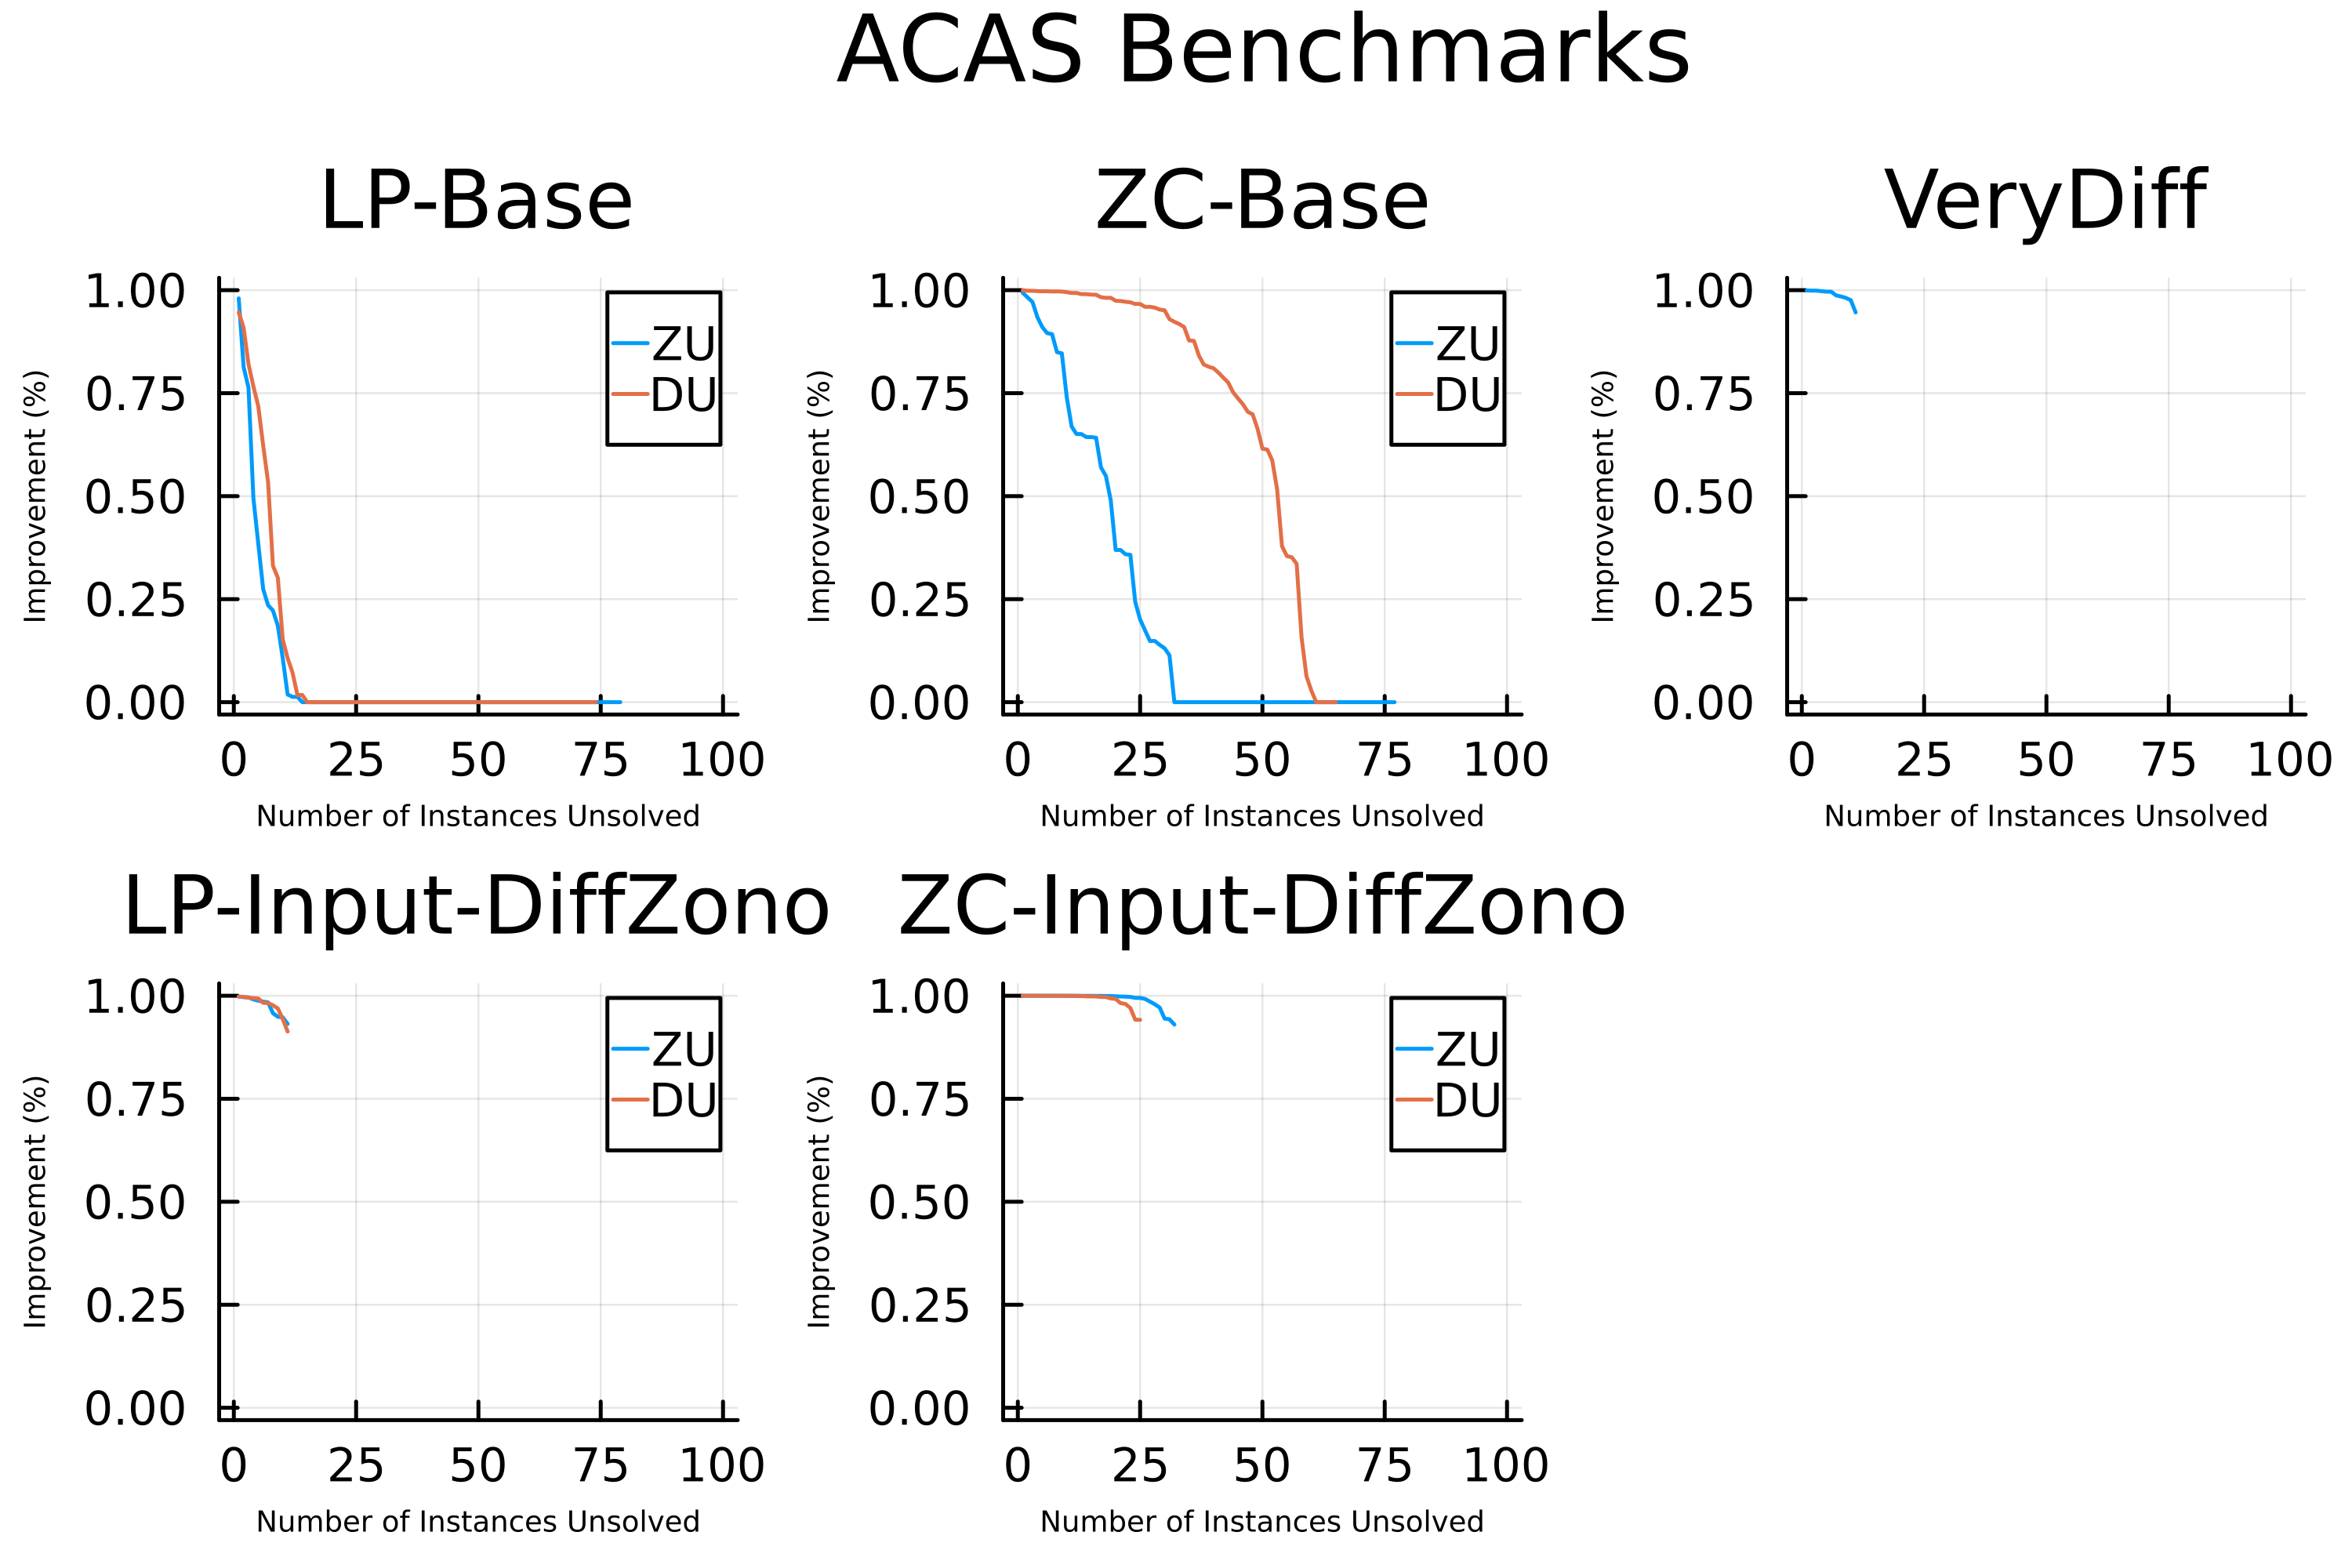

In [29]:
num_configs = size(configs, 1) + 1

p = plot(dpi=500, xlims=(0, 100), ylims=(0, 1), widen=true, xguidefontsize=5, yguidefontsize=5; layout=num_configs)
xlabel!("Number of Instances Unsolved")
ylabel!("Improvement (%)")

name, rgxs = verydiff_config
indices = filter_indices(acas_unsolved, rgxs)
plot!(p, x_acas_unsolved[indices], y_acas_unsolved[indices], title=name, label=nothing, subplot=3)

for (i, (name, rgxs)) in enumerate(configs)
    indices = filter_indices(acas_unsolved, rgxs)
    plot!(p, x_acas_unsolved[indices], y_acas_unsolved[indices], title=name, label=["ZU" "DU"], subplot=(i + i ÷ 3))
end

plot!(p, plot_title="ACAS Benchmarks", plot_titlevspan=0.1)

savefig(p, "acas_benchmarks_lp_zc_unsolved.png")

p